# Week 5&6  - Data Formats/Data Structures/Data Sources

## 1. Activity 7 

1. Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

In [1]:
#Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen

2. Read the page using bs4

In [2]:
url='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

html = urlopen(url)  #Read data from url 
soup = BeautifulSoup(html, 'html.parser') #Use beautifulsoup to parse the html 

print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-lim

3. Find the table structure you will need to deal with (how many tables there are?)

In [3]:
tables = soup.find_all("table") #Finding all tables in a list
print('Number of tables : ',len(tables))

Number of tables :  7


4. Find the right table using bs4

In [4]:
gdp_table = soup.find("table", { 'class' : 'wikitable' }) #Looking for the table with the classes 'wikitable' 
print(len(gdp_table)) 
gdp_table

4


<table border="1" class="wikitable sortable static-row-numbers plainrowheaders srn-white-background" style="text-align:right;">
<caption>GDP (USD million) by country
</caption>
<tbody><tr class="static-row-header" style="text-align:center;vertical-align:bottom;">
<th rowspan="2">Country/Territory
</th>
<th rowspan="2"><a href="/wiki/United_Nations_geoscheme" title="United Nations geoscheme">UN Region</a>
</th>
<th colspan="2"><a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">IMF</a><sup class="reference" id="cite_ref-GDP_IMF_2-2"><a href="#cite_note-GDP_IMF-2">[1]</a></sup><sup class="reference" id="cite_ref-15"><a href="#cite_note-15">[13]</a></sup>
</th>
<th colspan="2"><a href="/wiki/World_Bank" title="World Bank">World Bank</a><sup class="reference" id="cite_ref-16"><a href="#cite_note-16">[14]</a></sup>
</th>
<th colspan="2"><a href="/wiki/United_Nations" title="United Nations">United Nations</a><sup class="reference" id="cite_ref-UN_17-0"><a href="#c

In [5]:
gdp_df = pd.read_html(str(gdp_table))[0] #Returning a Dataframes from the table that includes the classes: wikitable (for gdp data) 
gdp_df

Country/Territory UN Region IMF[1][13]            World Bank[14]  \
    Country/Territory UN Region   Estimate       Year       Estimate   
0               World         —  105568776       2023       96513077   
1       United States  Americas   26854599       2023       22996100   
2               China      Asia   19373586  [n 1]2023       17734063   
3               Japan      Asia    4409738       2023        4937422   
4             Germany    Europe    4308854       2023        4223116   
..                ...       ...        ...        ...            ...   
212          Anguilla  Americas          —          —              —   
213          Kiribati   Oceania        248       2023            207   
214             Nauru   Oceania        151       2023            133   
215        Montserrat  Americas          —          —              —   
216            Tuvalu   Oceania         65       2023             63   

               United Nations[15]             
          Year           Estimate       Year  
0         2021           85328323       2020  
1         2021           23315081       2021  
2    [n 3]2021           17734131  [n 1]2021  
3         2021            4940878       2021  
4         2021            4259935       2021  
..         ...                ...        ...  
212          —                258       2020  
213       2021                181       2020  
214       2021                135       2020  
215          —                 68       2020  
216       2021                 55       2020  

[217 rows x 8 columns]

5. Separate the source names and their corresponding data

In [6]:
sources = gdp_table.tbody.findAll('tr', recursive=False)[0] #Reading the gdp table and separating the source names and data table
sources_list = [th for th in sources.findAll('th')] #Source names (columns)
print('Source List:',len(sources_list))
 
data_tables = gdp_table.tbody.findAll('tr')[1:] #Data table  
print('Data Table:',len(data_tables))

Source List: 5
Data Table: 218


6. Get the source names from the list of sources you have created

In [7]:
source_names = []
for source in sources_list:
    source_name = source.text.strip()
    source_names.append(source_name)
print(source_names[2:]) #Skipping the first 2 columns country/territory and UN region.

['IMF[1][13]', 'World Bank[14]', 'United Nations[15]']


7. Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that

In [8]:
header_1 = [th.getText().strip() for th in gdp_table.findAll('tr')[0].findAll('th')][:3] #Separating first 3 headers 
header_1

['Country/Territory', 'UN Region', 'IMF[1][13]']

In [9]:
IMF_data = gdp_df[header_1] #creating the dataframe for the selected headers
IMF_data

Country/Territory UN Region IMF[1][13]           
    Country/Territory UN Region   Estimate       Year
0               World         —  105568776       2023
1       United States  Americas   26854599       2023
2               China      Asia   19373586  [n 1]2023
3               Japan      Asia    4409738       2023
4             Germany    Europe    4308854       2023
..                ...       ...        ...        ...
212          Anguilla  Americas          —          —
213          Kiribati   Oceania        248       2023
214             Nauru   Oceania        151       2023
215        Montserrat  Americas          —          —
216            Tuvalu   Oceania         65       2023

[217 rows x 4 columns]

8. Repeat the last task for the other two data sources

In [10]:
all_headers = [th.getText().strip() for th in gdp_table.findAll('tr')[0].findAll('th')]

header_2 = []
header_2.append(all_headers[0])
header_2.append(all_headers[1])
header_2.append(all_headers[3]) # World Bank
header_2 

['Country/Territory', 'UN Region', 'World Bank[14]']

In [11]:
WB_data = gdp_df[header_2] # Dataframe with World Bank data
WB_data

Country/Territory UN Region World Bank[14]           
    Country/Territory UN Region       Estimate       Year
0               World         —       96513077       2021
1       United States  Americas       22996100       2021
2               China      Asia       17734063  [n 3]2021
3               Japan      Asia        4937422       2021
4             Germany    Europe        4223116       2021
..                ...       ...            ...        ...
212          Anguilla  Americas              —          —
213          Kiribati   Oceania            207       2021
214             Nauru   Oceania            133       2021
215        Montserrat  Americas              —          —
216            Tuvalu   Oceania             63       2021

[217 rows x 4 columns]

In [12]:
header_3 = []
header_3.append(all_headers[0])
header_3.append(all_headers[1])
header_3.append(all_headers[4]) #United Nations
header_3

['Country/Territory', 'UN Region', 'United Nations[15]']

In [13]:
WB_data = gdp_df[header_3] #Dataframe with United Nations Data
WB_data

Country/Territory UN Region United Nations[15]           
    Country/Territory UN Region           Estimate       Year
0               World         —           85328323       2020
1       United States  Americas           23315081       2021
2               China      Asia           17734131  [n 1]2021
3               Japan      Asia            4940878       2021
4             Germany    Europe            4259935       2021
..                ...       ...                ...        ...
212          Anguilla  Americas                258       2020
213          Kiribati   Oceania                181       2020
214             Nauru   Oceania                135       2020
215        Montserrat  Americas                 68       2020
216            Tuvalu   Oceania                 55       2020

[217 rows x 4 columns]

## 2. Activity 8

1. Read the visit_data.csv file.

In [14]:
visit_data_df = pd.read_csv("visit_data.csv") #Read the visit_data csv file
visit_data_df

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
997,998,NaN,NaN,ggallamorerp@meetup.com,Female,118.65.94.40,NaN
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


2. Check for duplicates.

In [15]:
duplicates = visit_data_df.duplicated() #Using duplicated function to identify duplicates
print("Duplicate Rows :  " + format(any(duplicates)))

Duplicate Rows :  False


In [16]:
#Using the duplicated function to identify if there are duplicates in each column
first_name_dup = visit_data_df.first_name.duplicated()
print("Duplicate Rows in First Name :  " + format(any(first_name_dup)))

last_name_dup = visit_data_df.last_name.duplicated()
print("Duplicate Rows in Last Name :  " + format(any(last_name_dup)))

email_dup = visit_data_df.email.duplicated()
print("Duplicate Rows in Email :  " + format(any(email_dup)))

gender_dup = visit_data_df.gender.duplicated()
print("Duplicate Rows in Gender :  " + format(any(gender_dup)))

ip_address_dup = visit_data_df.ip_address.duplicated()
print("Duplicate Rows in IP address :  " + format(any(ip_address_dup)))
 

visit_dup = visit_data_df.visit.duplicated()
print("Duplicate Rows in visit :  " + format(any(visit_dup)))

Duplicate Rows in First Name :  True
Duplicate Rows in Last Name :  True
Duplicate Rows in Email :  False
Duplicate Rows in Gender :  True
Duplicate Rows in IP address :  False
Duplicate Rows in visit :  True


3. Check if any essential column contains NaN.

In [17]:
#Using the isnull function to identify NaN values in each columns
print("First Name contains NaN - %r " % visit_data_df.first_name.isnull().values.any())
print("Last Name contains NaN - %r " % visit_data_df.last_name.isnull().values.any())
print("Email contains NaN - %r" %visit_data_df.email.isnull().values.any())
print("Gender contains NaN - %r" %visit_data_df.gender.isnull().values.any())
print("IP Address contains NaN - %r" %visit_data_df.ip_address.isnull().values.any())
print("Visit contains NaN - %r " % visit_data_df.visit.isnull().values.any())

First Name contains NaN - True 
Last Name contains NaN - True 
Email contains NaN - False
Gender contains NaN - True
IP Address contains NaN - False
Visit contains NaN - True 


4. Get rid of the outliers.

In [18]:
from scipy import stats
import numpy as np

prev_size = visit_data_df.shape # Storing previous size of dataframe before removing outliers
visit_data_df = visit_data_df[np.isfinite(visit_data_df.visit)] #Inplace operation. Original Dataframe will be modified after this. 
curr_size = visit_data_df.shape

print('Previous size : ', prev_size)
print('Current size : ', curr_size)
visit_data_df

Previous size :  (1000, 7)
Current size :  (974, 7)


,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


5. Report the size difference.

In [19]:
print("Size of the Dataframe with outliers is {}, and without outliers is {}".format(prev_size,curr_size)) 

Size of the Dataframe with outliers is (1000, 7), and without outliers is (974, 7)


6. Create a box plot to check for outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x20ec1a94c40>,
 'caps': [<matplotlib.lines.Line2D at 0x20ec1abc1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ec1a949a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ec1abc700>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ec1abc9a0>],
 'means': []}

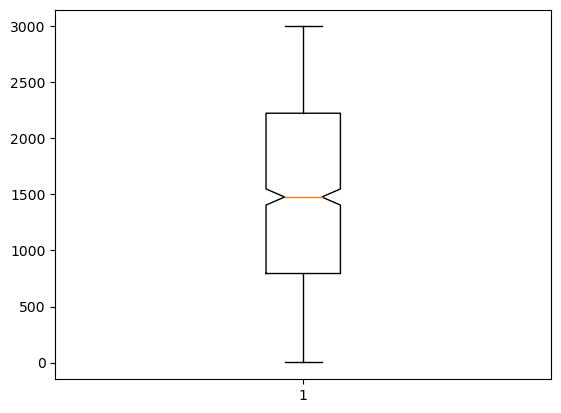

In [20]:
import matplotlib.pyplot as plt
#Boxplots are one way of identifying outliers.
plt.boxplot(visit_data_df.visit, notch=True)

7. Get rid of any outliers.

In [21]:
#Per the solution, values beyond 2900 and below 100 are outliers. Getting rid of these values.
visit_data_df_outliers = visit_data_df[(visit_data_df.visit <= 2900) & (visit_data_df.visit >= 100)]
visit_data_df_outliers

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0
...,...,...,...,...,...,...,...
994,995,NaN,NaN,hlowethrm@army.mil,Female,104.234.36.172,747.0
995,996,Averil,Pickover,apickoverrn@vk.com,Male,10.45.16.167,1305.0
996,997,Walton,Hallewell,whallewellro@nasa.gov,NaN,231.224.238.232,2531.0
998,999,Sapphira,Terron,sterronrq@wordpress.org,NaN,24.77.234.208,250.0


In [22]:
print("After getting rid of outliers the new size of the data is - {}".format(*visit_data_df_outliers.shape))

After getting rid of outliers the new size of the data is - 923


## 3. Insert data into a SQL Lite database – create a table with the following data below that you will create yourself 

### a. Name, Address, City, State, Zip, Phone Number

In [23]:
#a. Name, Address, City, State, Zip, Phone Number¶
import sqlite3

#Drop query string to drop table before creating it again. 
#Need this to avoid error from multiple executions of the create table.
drop_table_query = """DROP TABLE IF EXISTS CustomerInfo;""" 

#Query string for table creation
sql_create_table = """ CREATE TABLE IF NOT EXISTS CustomerInfo (
                                        id INTEGER PRIMARY KEY,
                                        Name text, 
                                        Address text, 
                                        City text, 
                                        State text, 
                                        Zip INTEGER, 
                                        PhoneNumber INTEGER
                                    ); """
# create a database connection
con = sqlite3.connect('mydata.sqlite') 

### b. Add at least 10 rows of data and submit your code with a query generating your results.

In [24]:
#Create a cursor to store the DB query return values, if any
cur = con.cursor()
#Execute the query string
try:    
    try:
        #Drop table before creating to avoid errors from multiple tests
        cur.execute(drop_table_query)
        #Create table CustomerInfo, if it doesn't exist.
    except sqlite3.Error as er:
        print('SQLite error in dropping the table : %s' % (' '.join(er.args)))  

    #Create the table
    cur.execute(sql_create_table)
    
    try:
        #Insert rows into the CustomerInfo table
        #Creating a list of records to insert
        records = [(1, 'Noah', '123 Test 1 Street', 'Houston', 'TX', 77007, 3429992847),
           (2, 'Adam', '345 Test 2 Street', 'Detroit', 'MI', 48127, 8782221755),
           (3, 'John', '678 Test 3 Street', 'Pittsburgh','PA', 15106, 4525682827),
           (4, 'Liam', '273 Test 4 Street', 'Virginia','VA', 20103, 6236998270),
           (5, 'Katy', '986 Test 5 Street', 'Chicago','IL', 60071, 9329522701),
           (6, 'Brandon', '8265 Test 6 Street', 'Phoenix','AZ', 85001, 2014452701),
           (7, 'Peter', '6377 Test 7 Street', 'San Jose','CA', 94008, 7339182746),
           (8, 'Michael', '726 Test 8 Street', 'Newberg', 'OR',97132, 6739184678),
           (9, 'Nathan', '3486 Test 9 Street', 'Denver', 'CO',80014, 3847162773),
           (10, 'Thomas', '374 Test 10 Street', 'Bentonville','AR', 72712, 2014452701)]
         #Creating the insert query string
        insert_query = """INSERT INTO CustomerInfo VALUES (?,?,?,?,?,?,?)"""
        cur.executemany(insert_query, records) #Execute insert statement

    except sqlite3.Error as er:
        print('SQLite error: %s' % (' '.join(er.args)))
        print("Exception class is: ", er.__class__)
    except sqlite3.OperationalError:
        print("Error in inserting rows in CustomerInfo table.")

except sqlite3.OperationalError:
    print("No such table: CustomerInfo")

In [25]:
try:
    # storing data in a list and retriving to display
    cur.execute("SELECT * FROM CustomerInfo") #Select query to get all records from the table
    data_list = cur.fetchall() #Fetching the cursor into a list
    print('{:10}{:20}{:25}{:15}{:10}{:15}{:10}'.format('Id', 'Name', 'Address', 'City', 'State','Zip' ,  'PhoneNumber'))
    print('{:10}{:20}{:25}{:15}{:10}{:15}{:10}'.format('----' , '----------'  , '-------------------' , '-------------', '--------' , '----------' , '-------------'))
    
    for item in data_list:
          print('{:10}{:20}{:25}{:15}{:10}{:15}{:10}'.format(str(item[0]), item[1], item[2], item[3], item[4], str(item[5]),str(item[6])))
except sqlite3.OperationalError:
    print('Error in reading table')   

Id        Name                Address                  City           State     Zip            PhoneNumber
----      ----------          -------------------      -------------  --------  ----------     -------------
1         Noah                123 Test 1 Street        Houston        TX        77007          3429992847
2         Adam                345 Test 2 Street        Detroit        MI        48127          8782221755
3         John                678 Test 3 Street        Pittsburgh     PA        15106          4525682827
4         Liam                273 Test 4 Street        Virginia       VA        20103          6236998270
5         Katy                986 Test 5 Street        Chicago        IL        60071          9329522701
6         Brandon             8265 Test 6 Street       Phoenix        AZ        85001          2014452701
7         Peter               6377 Test 7 Street       San Jose       CA        94008          7339182746
8         Michael             726 Test 8 S

In [26]:
con.commit() #commit and close the database connection
con.close()